In [2]:
import pandas as pd

df = pd.read_csv('raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce', utc=True)

In [3]:
df['headline_length'] = df['headline'].apply(len)
df['headline_length'].describe()

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


In [4]:
df['publisher'].value_counts().head(10)

,count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


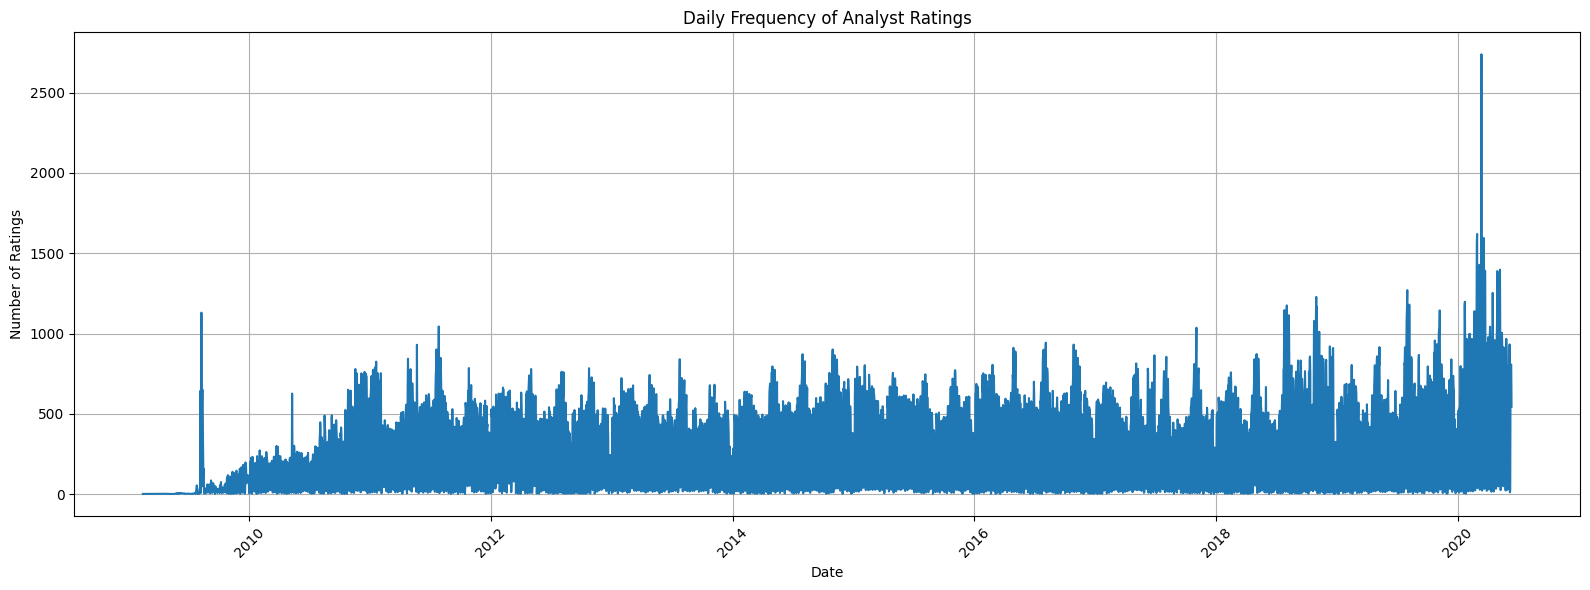

In [5]:
import matplotlib.pyplot as plt

daily_counts = df['date'].dt.date.value_counts().sort_index()

plt.figure(figsize=(16, 6))
daily_counts.plot()
plt.title('Daily Frequency of Analyst Ratings')
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-6-d3fa5e218f05>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


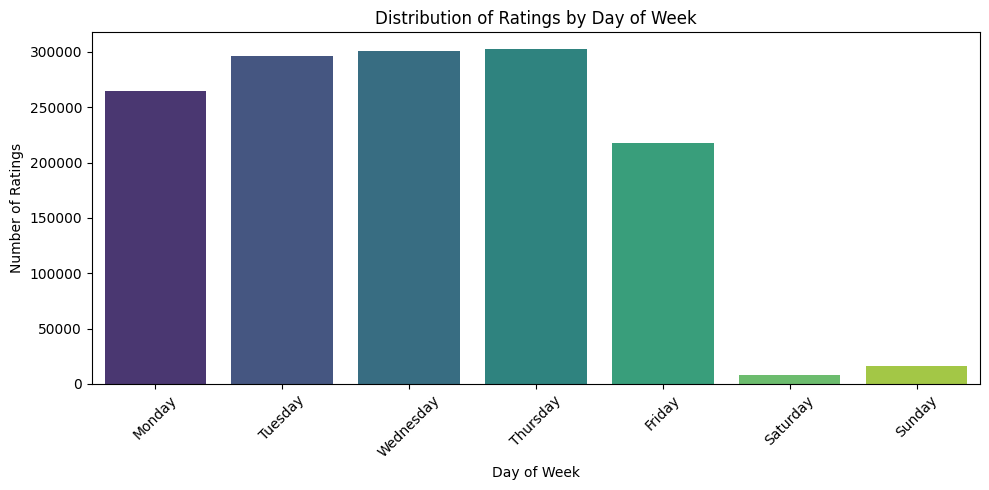

In [6]:
import seaborn as sns

df['day_of_week'] = df['date'].dt.day_name()
day_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Distribution of Ratings by Day of Week')
plt.ylabel('Number of Ratings')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='hour'>

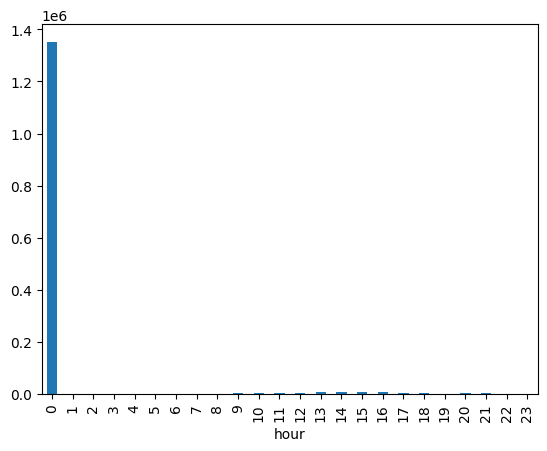

In [7]:
df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar')

In [8]:
df['domain'] = df['publisher'].str.extract(r'@([\w\.]+)')
df['domain'].value_counts().head(10)

,count
domain,
benzinga.com,7937
gmail.com,139
andyswan.com,5
investdiva.com,2
tothetick.com,2
eosdetroit.io,1
forextraininggroup.com,1
stockmetrix.net,1


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)
X = vectorizer.fit_transform(df['headline'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [10]:
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic #0:
['highest', 'low', 'set', 'etfs', 'industry', 'watch', '52', 'new', 'week', 'stocks']
Topic #1:
['52', 'downgrades', 'upgrades', 'movers', 'morgan', 'stocks', 'week', 'scheduled', 'benzinga', 'earnings']
Topic #2:
['blog', 'deal', 'energy', 'new', 'analyst', 'update', 'reports', 'shares', 'announces', 'says']
Topic #3:
['q3', 'q2', 'estimate', 'q4', 'q1', 'sales', 'reports', 'eps', 'est', 'vs']
Topic #4:
['trading', 'maintains', 'target', 'mid', 'price', 'buy', 'update', 'pt', 'shares', 'market']
